In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

print(df.shape)
df.head()

(1987, 10)


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
df['ChronicDiseases'] = np.where(df['ChronicDiseases'] == 1, 'Yes', 'No')

# EDA

## Target Variable

In [5]:
target = 'TravelInsurance'

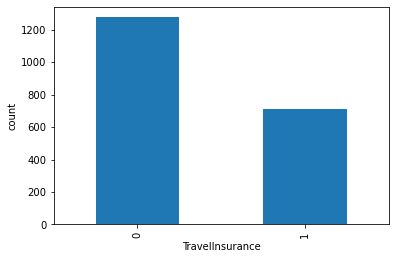

In [6]:
df.groupby(target)['Age'].count().plot.bar()
plt.xlabel(target)
plt.ylabel('count')
plt.show()

In [7]:
print('N: {}%'.format((df[target].value_counts()[0] / len(df)) * 100))
print('Y: {}%'.format((df[target].value_counts()[1] / len(df)) * 100))

N: 64.26774031202818%
Y: 35.73225968797182%


## Missing Values

In [8]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

## Numeric Features

In [9]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O' and feature != target]

df[num_features].head()

,Age,AnnualIncome,FamilyMembers
0,31,400000,6
1,31,1250000,7
2,34,500000,4
3,28,700000,3
4,28,700000,8


### Discrete Features

In [10]:
dis_features = [feature for feature in num_features if len(df[feature].unique()) < 20]

print(dis_features)

['Age', 'FamilyMembers']


#### Distribution

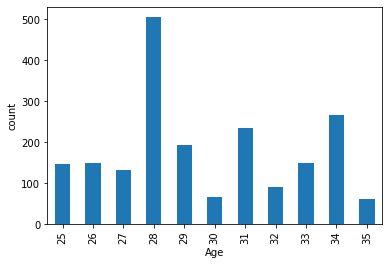

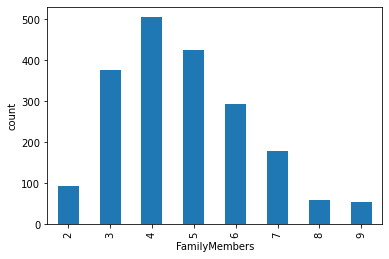

In [11]:
for feature in dis_features:
    df.groupby(feature)[target].count().plot.bar()
    
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

#### vs Target Variable

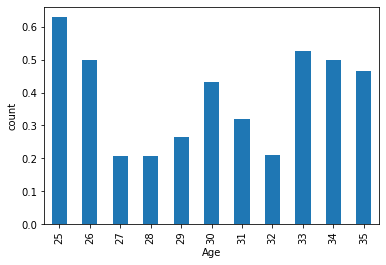

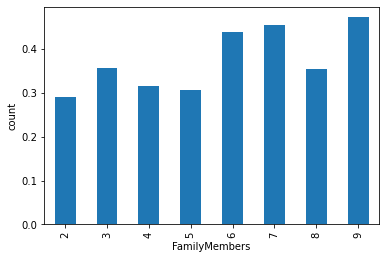

In [12]:
for feature in dis_features:
    df.groupby(feature)[target].mean().plot.bar()
    
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

### Continuous Variables

In [13]:
con_features = [feature for feature in num_features if feature not in dis_features]

print(con_features)

['AnnualIncome']


#### Distribution

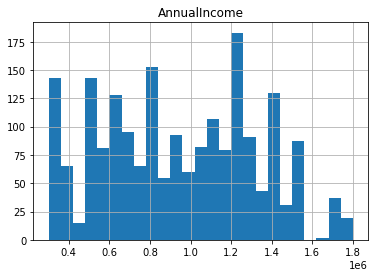

In [14]:
df[con_features].hist(bins = 25)
plt.show()

## Categorical Features

In [17]:
cat_features = [feature for feature in df.columns if feature not in num_features and feature != target]

df[cat_features].head()

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,Government Sector,Yes,Yes,No,No
1,Private Sector/Self Employed,Yes,No,No,No
2,Private Sector/Self Employed,Yes,Yes,No,No
3,Private Sector/Self Employed,Yes,Yes,No,No
4,Private Sector/Self Employed,Yes,Yes,Yes,No


In [18]:
for feature in cat_features:
    print('{}: {} categories'.format(feature, len(df[feature].unique())))

Employment Type: 2 categories
GraduateOrNot: 2 categories
ChronicDiseases: 2 categories
FrequentFlyer: 2 categories
EverTravelledAbroad: 2 categories


### Distribution

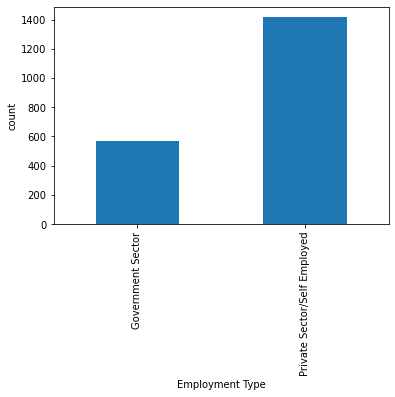

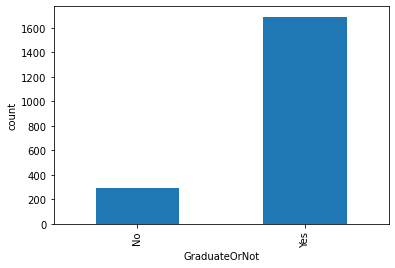

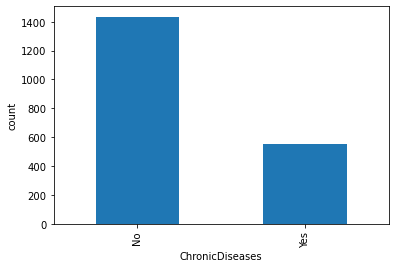

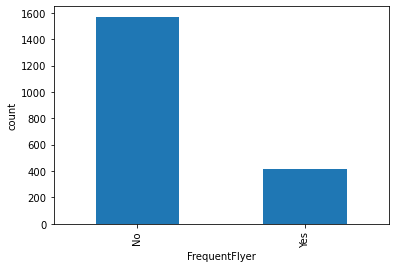

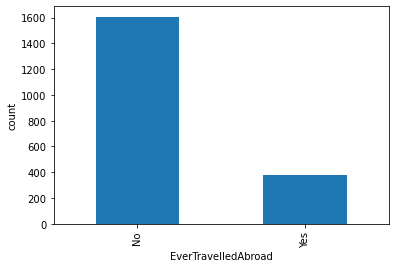

In [19]:
for feature in cat_features:
    df.groupby(feature)[target].count().plot.bar()
    
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

### vs Target Variable

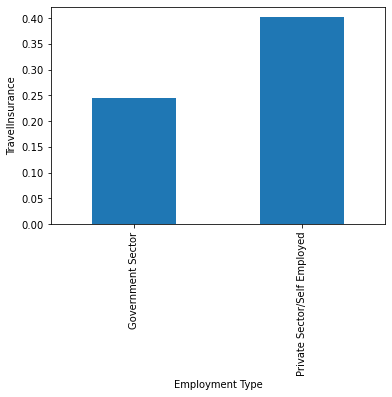

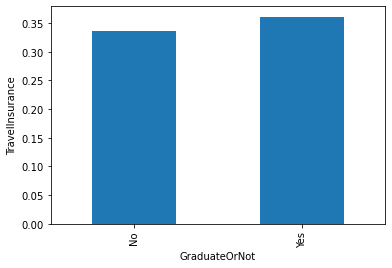

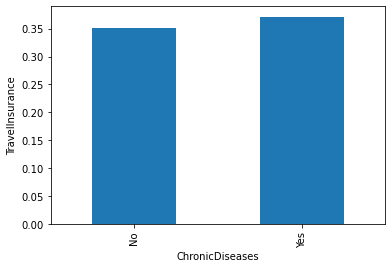

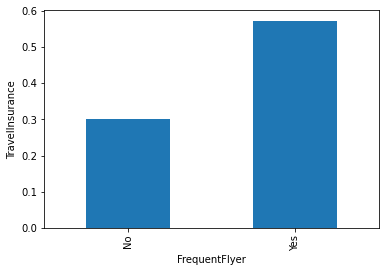

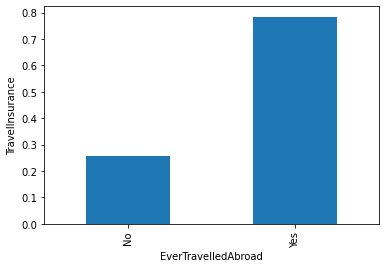

In [20]:
for feature in cat_features:
    df.groupby(feature)[target].mean().plot.bar()
    
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

### Observations
1. Frequenet fliers are more likely to purchase insurance
2. People who have travelled abroad are more likely to purchase insurance

# Feature Engineering

In [21]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,Yes,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,0


In [22]:
dummy_df = pd.get_dummies(df, drop_first = True)
dummy_df.head()

,Age,AnnualIncome,FamilyMembers,TravelInsurance,Employment Type_Private Sector/Self Employed,GraduateOrNot_Yes,ChronicDiseases_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
0,31,400000,6,0,0,1,1,0,0
1,31,1250000,7,0,1,1,0,0,0
2,34,500000,4,1,1,1,1,0,0
3,28,700000,3,0,1,1,1,0,0
4,28,700000,8,0,1,1,1,1,0


In [23]:
dummy_df.to_csv('processed_data.csv', index = False)

# Feature Selection

In [26]:
df = pd.read_csv('processed_data.csv')

df.head()

,Age,AnnualIncome,FamilyMembers,TravelInsurance,Employment Type_Private Sector/Self Employed,GraduateOrNot_Yes,ChronicDiseases_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
0,31,400000,6,0,0,1,1,0,0
1,31,1250000,7,0,1,1,0,0,0
2,34,500000,4,1,1,1,1,0,0
3,28,700000,3,0,1,1,1,0,0
4,28,700000,8,0,1,1,1,1,0


In [30]:
X = df.drop(target, axis = 1)
y = df[target]

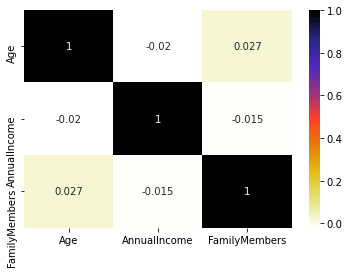

In [31]:
cor = X[num_features].corr()

sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

# Models

## Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [33]:
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [34]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Models

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression()

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [42]:
y_pred_lr = model.predict(X_test_scaled)

In [43]:
print(confusion_matrix(y_test, y_pred_lr))

[[237  23]
 [ 69  69]]


In [45]:
print(classification_report(y_test, y_pred_lr, digits = 4))

              precision    recall  f1-score   support

           0     0.7745    0.9115    0.8375       260
           1     0.7500    0.5000    0.6000       138

    accuracy                         0.7688       398
   macro avg     0.7623    0.7058    0.7187       398
weighted avg     0.7660    0.7688    0.7551       398



In [46]:
print(accuracy_score(y_test, y_pred_lr))

0.7688442211055276


### KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
scores = []
neighbors = np.arange(5, 13)
print(neighbors)
for i in range(5, 12):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train_scaled, y_train)
    scores.append(model.score(X_test_scaled, y_test))
    
best_neighbors = neighbors[scores.index(max(scores))]
print(best_neighbors)

[ 5  6  7  8  9 10 11 12]
8


In [56]:
model = KNeighborsClassifier(n_neighbors = best_neighbors)

In [57]:
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=8)

In [58]:
y_pred_knn = model.predict(X_test_scaled)

In [59]:
print(confusion_matrix(y_test, y_pred_knn))

[[243  17]
 [ 60  78]]


In [60]:
print(classification_report(y_test, y_pred_knn, digits = 4))

              precision    recall  f1-score   support

           0     0.8020    0.9346    0.8632       260
           1     0.8211    0.5652    0.6695       138

    accuracy                         0.8065       398
   macro avg     0.8115    0.7499    0.7664       398
weighted avg     0.8086    0.8065    0.7961       398



In [61]:
print(accuracy_score(y_test, y_pred_knn))

0.8065326633165829


### SVM

In [62]:
from sklearn.svm import SVC

In [94]:
model = SVC(kernel = 'poly', degree = 4)

In [95]:
model.fit(X_train_scaled, y_train)

SVC(degree=4, kernel='poly')

In [96]:
y_pred_svm = model.predict(X_test_scaled)

In [97]:
print(confusion_matrix(y_test, y_pred_svm))

[[249  11]
 [ 61  77]]


In [98]:
print(classification_report(y_test, y_pred_svm, digits = 4))

              precision    recall  f1-score   support

           0     0.8032    0.9577    0.8737       260
           1     0.8750    0.5580    0.6814       138

    accuracy                         0.8191       398
   macro avg     0.8391    0.7578    0.7776       398
weighted avg     0.8281    0.8191    0.8070       398



In [99]:
print(accuracy_score(y_test, y_pred_svm))

0.8190954773869347


## Ensemble Models

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
model = RandomForestClassifier()

In [103]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
y_pred_rf = model.predict(X_test)

In [105]:
print(confusion_matrix(y_test, y_pred_rf))

[[223  37]
 [ 49  89]]


In [106]:
print(classification_report(y_test, y_pred_rf, digits = 4))

              precision    recall  f1-score   support

           0     0.8199    0.8577    0.8383       260
           1     0.7063    0.6449    0.6742       138

    accuracy                         0.7839       398
   macro avg     0.7631    0.7513    0.7563       398
weighted avg     0.7805    0.7839    0.7814       398



In [107]:
print(accuracy_score(y_test, y_pred_rf))

0.7839195979899497


### XGBoost 

In [108]:
from xgboost import XGBClassifier

In [112]:
model = XGBClassifier(use_label_encoder = False)

In [113]:
model.fit(X_train, y_train)

[20:53:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [114]:
y_pred_xgb = model.predict(X_test)

In [115]:
print(confusion_matrix(y_test, y_pred_xgb))

[[230  30]
 [ 51  87]]


In [116]:
print(classification_report(y_test, y_pred_xgb, digits = 4))

              precision    recall  f1-score   support

           0     0.8185    0.8846    0.8503       260
           1     0.7436    0.6304    0.6824       138

    accuracy                         0.7965       398
   macro avg     0.7810    0.7575    0.7663       398
weighted avg     0.7925    0.7965    0.7921       398



In [117]:
print(accuracy_score(y_test, y_pred_svm))

0.8190954773869347


# Hyperparameter Tuning

In [118]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Random Forest

In [119]:
n_estimators = [50, 100, 200, 400, 500, 700, 900]
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = [None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [120]:
model = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.0min finished


{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': True}

In [123]:
n_estimators = [800,900, 1000, 1100]
criterion = ['gini']
max_features = ['log2']
max_depth = [None]
min_samples_split = [2, 3, 4]
min_samples_leaf = [3, 4, 5, 6]
bootstrap = [True]

param_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [124]:
model = RandomForestClassifier()

rf_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

rf_grid.fit(X_train, y_train)

rf_grid.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.1min finished


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 800}

In [126]:
model = RandomForestClassifier(n_estimators = 800,
                               min_samples_split = 2,
                               min_samples_leaf = 4,
                               max_features = 'log2',
                               max_depth = None,
                               criterion = 'gini',
                               bootstrap = True)

model.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=4,
                       n_estimators=800)

In [129]:
y_pred_hp_rf = model.predict(X_test)

In [130]:
print(confusion_matrix(y_test, y_pred_hp_rf))

[[250  10]
 [ 58  80]]


In [131]:
print(classification_report(y_test, y_pred_hp_rf, digits = 4))

              precision    recall  f1-score   support

           0     0.8117    0.9615    0.8803       260
           1     0.8889    0.5797    0.7018       138

    accuracy                         0.8291       398
   macro avg     0.8503    0.7706    0.7910       398
weighted avg     0.8385    0.8291    0.8184       398



In [132]:
print(accuracy_score(y_test, y_pred_hp_rf))

0.8291457286432161


## XGBoost

In [133]:
n_estimators = [50, 100, 200, 400, 500, 700, 900]
learning_rate = [0.05, 0.1, 0.3, 0.5]
gamma = [0, 0.1, 0.2]
subsample = [0.6, 0.7, 0.8]
colsample_bytree = [0.6, 0.7, 0.8]

random_grid = {'n_estimators': n_estimators,
               'use_label_encoder':[False],
               'learning_rate': learning_rate,
               'max_depth': [None],
               'gamma': gamma,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree}

In [134]:
model = XGBClassifier()

xgb_random = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

xgb_random.fit(X, y)

xgb_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.8s


[21:06:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   56.7s finished


{'use_label_encoder': False,
 'subsample': 0.6,
 'n_estimators': 50,
 'max_depth': None,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.8}

In [135]:
model = XGBClassifier(n_estimators = 50,
                      max_depth = None,
                      learning_rate = 0.05,
                      gamma = 0.1,
                      colsample_bytree = 0.8,
                      subsample = 0.6,
                      use_label_encoder = False)

model.fit(X_train, y_train)
model.score(X_test, y_test)

[21:07:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8241206030150754

In [138]:
n_estimators = [20, 35, 50, 65, 80]
learning_rate = [0.0005, 0.001, 0.05, 0.1]
gamma = [0, 0.1, 0.2]
subsample = [0.6, 0.7, 0.8]
colsample_bytree = [0.6, 0.7, 0.8]

param_grid = {'n_estimators': n_estimators,
               'use_label_encoder':[False],
               'learning_rate': learning_rate,
               'max_depth': [None],
               'gamma': gamma,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree}

In [139]:
model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

xgb_grid.fit(X, y)

xgb_grid.best_params_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   33.6s


[21:11:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   44.0s finished


{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.0005,
 'max_depth': None,
 'n_estimators': 50,
 'subsample': 0.6,
 'use_label_encoder': False}

In [141]:
model = XGBClassifier(n_estimators = 50,
                      max_depth = None,
                      learning_rate = 0.05,
                      gamma = 0.1,
                      colsample_bytree = 0.8,
                      subsample = 0.6,
                      use_label_encoder = False)

model.fit(X_train, y_train)
model.score(X_test, y_test)

[21:13:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8241206030150754

# ANN

In [261]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [270]:
model = Sequential()

In [271]:
model.add(Dense(units = 128, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 8))
model.add(Dropout(0.2))
model.add(Dense(units = 128, kernel_initializer = 'he_uniform', activation = 'relu'))
model.add(Dense(units = 128, kernel_initializer = 'he_uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [272]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_109 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_110 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 129       
Total params: 34,305
Trainable params: 34,305
Non-trainable params: 0
_________________________________________________________________


In [273]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [274]:
model_history = model.fit(X_train_scaled, y_train, validation_split = 0.3, epochs = 100)

Epoch 1/100
35/35 [==============================] - 1s 7ms/step - loss: 0.6368 - accuracy: 0.6710 - val_loss: 0.5540 - val_accuracy: 0.7463
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7758 - val_loss: 0.5670 - val_accuracy: 0.7296
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.7505 - val_loss: 0.5446 - val_accuracy: 0.7589
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.5072 - accuracy: 0.7821 - val_loss: 0.5351 - val_accuracy: 0.7652
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5112 - accuracy: 0.7667 - val_loss: 0.5393 - val_accuracy: 0.7610
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.7769 - val_loss: 0.5277 - val_accuracy: 0.7673
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5148 - accuracy: 0.7641 - val_loss: 0.5198 - val_accuracy: 0.7736
Epoch 8/100
3

Epoch 59/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3706 - accuracy: 0.8489 - val_loss: 0.5285 - val_accuracy: 0.7904
Epoch 60/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8345 - val_loss: 0.5325 - val_accuracy: 0.7904
Epoch 61/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3700 - accuracy: 0.8617 - val_loss: 0.5276 - val_accuracy: 0.7883
Epoch 62/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3766 - accuracy: 0.8504 - val_loss: 0.5294 - val_accuracy: 0.7904
Epoch 63/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3668 - accuracy: 0.8529 - val_loss: 0.5329 - val_accuracy: 0.7987
Epoch 64/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4061 - accuracy: 0.8195 - val_loss: 0.5378 - val_accuracy: 0.7841
Epoch 65/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3738 - accuracy: 0.8392 - val_loss: 0.5280 - val_accuracy: 0.7945
Epoch 

In [275]:
y_pred_ann = np.round(model.predict(X_test_scaled))

In [276]:
print(confusion_matrix(y_test, y_pred_ann))

[[231  29]
 [ 55  83]]


In [277]:
print(classification_report(y_test, y_pred_ann, digits = 4))

              precision    recall  f1-score   support

           0     0.8077    0.8885    0.8462       260
           1     0.7411    0.6014    0.6640       138

    accuracy                         0.7889       398
   macro avg     0.7744    0.7450    0.7551       398
weighted avg     0.7846    0.7889    0.7830       398

